In [ ]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

# load data

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL Image to Tensor
])
train_dataset = datasets.MNIST(root='./data',  # Directory to save the dataset
                               train=True,
                                 download=True,  # Download if not already present
                               transform=transform
                              )
test_dataset = datasets.MNIST(root='./data',  # Directory to save the dataset
                               train=False,
                                 download=True,  # Download if not already present
                              transform=transform
                              )

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

# build network

In [ ]:
from logging import exception
import torch.nn as nn
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=12,stride=2,padding=0)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5,stride=1,padding=2,padding_mode='zeros') # padding is on both sides
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    self.fc3   = nn.Linear(in_features=1024, out_features=512)
    self.relu3 = nn.ReLU()
    self.fc4   = nn.Linear( in_features=512,out_features=10)

  def forward(self,x):
    #print(x.shape)
    x=self.conv1(x)
    #print(x.shape)
    x=self.relu1(x)
    #print(x.shape)
    x=self.conv2(x)
    #print(x.shape)
    x=self.relu2(x)
    #print(x.shape)
    x=self.pool2(x)
    #print(x.shape)
    x= torch.flatten(x, start_dim=1)
    #print(x.shape)
    x=self.fc3(x)
    x=self.relu3(x)
    #print(x.shape)
    x=self.fc4(x)


    return x

In [ ]:
model=CNN()

# define loss and optimizer


In [ ]:
# Define the loss function
loss = nn.CrossEntropyLoss()

# Define an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001,)

# define train process

In [ ]:
def train(epoch,batch_size):
  train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
  iters =len(train_loader)
  for e in range(epoch):
    acc_loss=0
    acc_accuracy=0
    for batch_idx, (data, target) in enumerate(train_loader):
      #might use this to modify dims
      #data = torch.nn.functional.interpolate(data, size=(32, 32))
      #data=data.permute(0, 2, 3, 1)  # ensure right sequence of the input  (batch_size, channels, height, width)

      logit=model.forward(data)
      ls = loss(logit,target)
      avg_loss =ls.item()
      acc_loss+=ls.item()
      optimizer.zero_grad()
      ls.backward()
      optimizer.step()

      #output prediction
      predicted_classes = torch.argmax(logit, dim=1)
      correct_predictions = (predicted_classes == target).float()
      accuracy = correct_predictions.sum() / batch_size  # Calculate accuracy
      acc_accuracy+=correct_predictions.sum()

      if batch_idx % 100 ==0 :
        print(f'iteration number : {batch_idx} , accuracy:{accuracy}, batch_loss:{avg_loss}'  )

    avg_accuracy =   acc_accuracy/len(train_dataset)
    avg_loss= acc_loss/iters
    print(f'epoch number:{e}, accuracy{avg_accuracy}, loss:{avg_loss} ')


In [ ]:
train(5,64)

iteration number : 0 , accuracy:0.015625, batch_loss:2.3038437366485596
iteration number : 100 , accuracy:0.859375, batch_loss:0.6965948343276978
iteration number : 200 , accuracy:0.953125, batch_loss:0.29054024815559387
iteration number : 300 , accuracy:0.9375, batch_loss:0.31513434648513794
iteration number : 400 , accuracy:0.921875, batch_loss:0.2842192053794861
iteration number : 500 , accuracy:0.9375, batch_loss:0.2653921842575073
iteration number : 600 , accuracy:0.921875, batch_loss:0.28745928406715393
iteration number : 700 , accuracy:0.890625, batch_loss:0.26875224709510803
iteration number : 800 , accuracy:0.984375, batch_loss:0.1079040989279747
iteration number : 900 , accuracy:0.875, batch_loss:0.3087029755115509
epoch number:0, accuracy0.880466639995575, loss:0.4503443025588989 
iteration number : 0 , accuracy:0.984375, batch_loss:0.10635484755039215
iteration number : 100 , accuracy:0.90625, batch_loss:0.18371279537677765
iteration number : 200 , accuracy:0.96875, batch_l

# test data validation


In [ ]:
def test(batch_size):
  test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
  iters =len(test_loader)
  with torch.no_grad():
    test_loss=0
    test_accuracy=0
    for batch_idx, (data, target) in enumerate(test_loader):
      logit=model.forward(data)
      ls = loss(logit,target)
      test_loss+=ls.item()

      #output prediction
      predicted_classes = torch.argmax(logit, dim=1)
      correct_predictions = (predicted_classes == target).float()
      accuracy = correct_predictions.sum() / batch_size  # Calculate accuracy
      test_accuracy+=correct_predictions.sum()

    test_accuracy =   test_accuracy/len(test_dataset)
    test_loss= test_loss/iters
    print(f' accuracy{test_accuracy}, loss:{test_loss} ')


In [ ]:
test(64)

 accuracy0.9840999841690063, loss:0.04996510878335803 


# visulize filters

In [ ]:
filters =model.conv1.weight.data

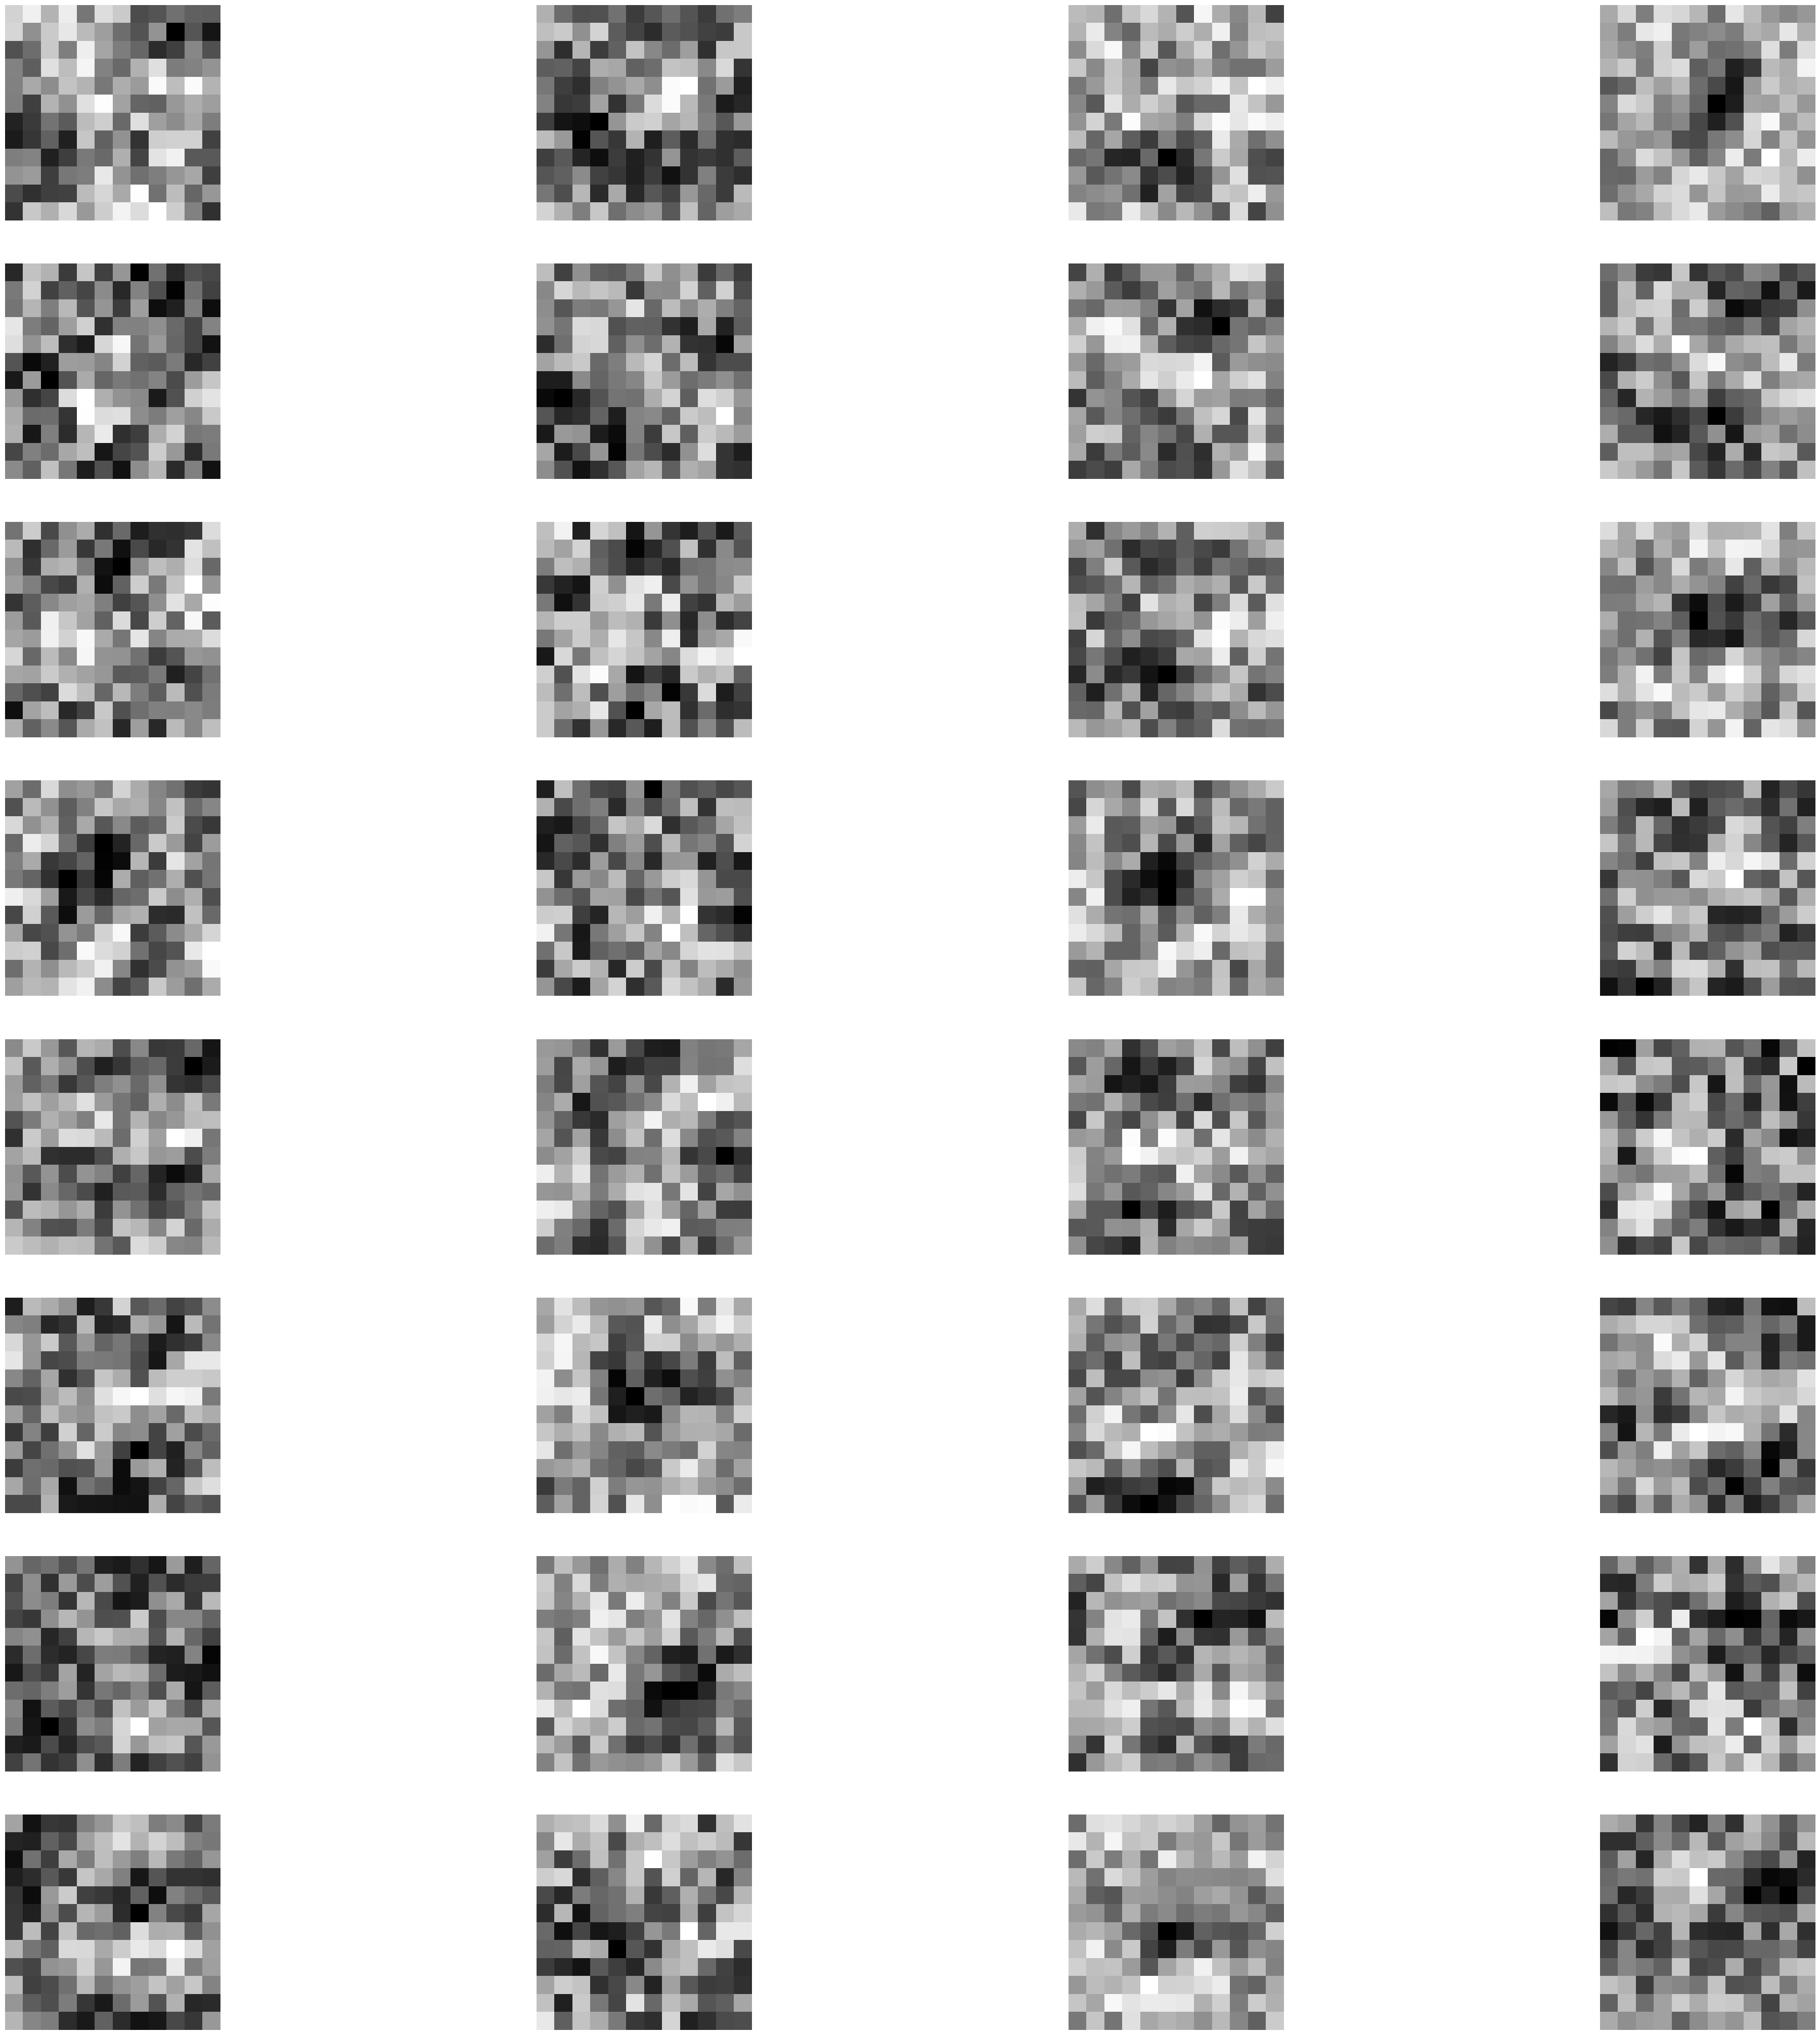

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(8, 4, figsize=(52, 52))
axes = axes.flatten()
for i in range(32):
    ax = axes[i]
    # Assuming the filter is 3x3 and the input has 1 channel
    ax.imshow(filters[i, 0].numpy(), cmap='gray')  # 0 for the first channel
    ax.axis('off')  # Hide axis